In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0


In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 4.2 MB/s 


In [ ]:
!pip install snntorch

     |████████████████████████████████| 89 kB 3.4 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, rms, poly_f, tonnetz, tempo, spect_cent, spect_flux, spect_roll, zcr,spect_flat):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if rms:
            rms = np.mean(librosa.feature.rms(y = X).T,axis = 0)
            result=np.hstack((result, rms))
        if poly_f:
            poly_f = np.mean(librosa.feature.poly_features(y = X, sr = sample_rate, center=True, pad_mode="reflect").T,axis = 0)
            result=np.hstack((result, poly_f))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate, chroma=None).T, axis=0)
            result = np.hstack((result,tonnetz))
        if tempo:
            tempo = np.mean(librosa.feature.tempogram(y=X, sr=sample_rate, center=True).T, axis = 0)
            result = np.hstack((result, tempo))
        if spect_cent:
            spect_cent = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate, center=True, pad_mode='reflect').T, axis = 0)
            result = np.hstack((result, spect_cent))
        if spect_flux:
            spect_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate, center=True).T, axis = 0)
            result = np.hstack((result, spect_flux))
        if spect_roll:
            spect_roll = np.mean(librosa.feature.spectral_rolloff(y=X, sr=sample_rate, center=True, pad_mode='reflect', roll_percent=0.85).T, axis = 0)
            result = np.hstack((result,spect_roll))
        if zcr:
            zcr = np.mean(librosa.feature.zero_crossing_rate(X,center=True).T, axis = 0)
            result = np.hstack((result, zcr))
        if spect_flat:
            spect_flact = np.mean(librosa.feature.spectral_flatness(y=X, center=True, pad_mode='reflect').T, axis = 0)
            result = np.hstack((result, spect_flat))
        # print(result)
        return result

In [ ]:
#DataFlair - Emotions in the RAVDESS dataset #convert them into rasas
emotions={
  '01':'veer',
  '02':'shanta',
  '03':'hasya',
  '04':'karuna',
  '05':'raudra',
  '06':'bhayanak',
  '07':'vibhatsa',
  '08':'adbhuta',
  '09':'shringara'
}

#DataFlair - Emotions to observe
observed_emotions=['shanta', 'hasya', 'bhayanak', 'vibhatsa','veer','karuna','raudra','adbhuta','shringara']

In [ ]:

#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    z,x,y=[],[],[]
    
    for file in glob.glob("/content/drive/MyDrive/Complete_new_dataset/*.wav"):
        file_name=os.path.basename(file)
        f_n = file_name
        if (f_n.split("-")[3] == "00.wav"):
          print(file_name)
        emotion=emotions[file_name.split("-")[3]]
        emotion=file_name.split("-")[3]
        # if emotion not in observed_emotions:
        #     continue
        feature=extract_feature(file, mfcc=True, chroma=False, mel=False, rms = False,poly_f = False, tonnetz = False, tempo = False, spect_cent = False, spect_flux = False, spect_roll = False, zcr = False ,spect_flat = False)
        # z.append(file_name)
        x.append(feature)
        y.append(emotion)
    y = [int(i) for i in y]
    # dataframe = pd.DataFrame(z,np.array(x),y)
    # print(dataframe)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=1)
    # return np.array(x),y

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [ ]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(675, 169)


In [ ]:
# x_train = np.array((x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train)))
# x_test = np.array((x_test-np.min(x_test))/(np.max(x_test)-np.min(x_test)))
# x_train = x_train/np.std(x_train)
# x_test = x_test/np.std(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [ ]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 40


In [ ]:
print(x_train.size)

27000


In [ ]:
x_train.shape

(675, 40)

In [ ]:
len(y_train)

675

In [ ]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(1800,), learning_rate='adaptive', max_iter=500)

In [ ]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(1800,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 93.49%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

[[ 7  1  0  0  1  0  0  1  0]
 [ 0 44  0  0  0  0  1  0  0]
 [ 0  0  3  0  0  1  0  0  0]
 [ 0  0  0 12  0  1  0  0  0]
 [ 0  0  0  0  3  0  0  0  0]
 [ 0  1  0  1  0 32  0  0  0]
 [ 0  0  0  0  0  2 24  0  0]
 [ 0  1  0  0  0  0  1 29  0]
 [ 0  0  0  0  0  0  0  0  3]]


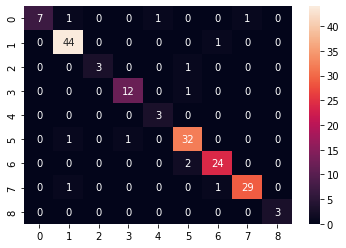

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

       angry     0.0000    0.0000    0.0000        10
        calm     0.2663    1.0000    0.4206        45
     disgust     0.0000    0.0000    0.0000         4
      energy     0.0000    0.0000    0.0000        13
     fearful     0.0000    0.0000    0.0000         3
       happy     0.0000    0.0000    0.0000        34
        love     0.0000    0.0000    0.0000        26
         sad     0.0000    0.0000    0.0000        31
   surprised     0.0000    0.0000    0.0000         3

    accuracy                         0.2663       169
   macro avg     0.0296    0.1111    0.0467       169
weighted avg     0.0709    0.2663    0.1120       169



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#PIPELINE:
classifier_names = ["LogisticRegression","RandomForestClassifier","SupportVector Machine","KNN","Naive Bayes","Decision Tree"]

classifiers = [LogisticRegression(), RandomForestClassifier(), LinearSVC(),KNeighborsClassifier(n_neighbors=4),GaussianNB(),DecisionTreeClassifier()]

zipped_clf = dict(zip(classifier_names,classifiers))

def classifier(classifier, x_train, y_train):
    res = {}
    for x,y in classifier.items():
        checker_pipeline = Pipeline(steps=[
            ('standardize', StandardScaler(with_mean=False)),                         
            ('classifier', y)
        ])
        #print("Validation result for {}".format(n))
        model=checker_pipeline.fit(x_train,y_train)
        res[x]=model
    return res


In [ ]:
res = classifier(zipped_clf, x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
res

{'Decision Tree': Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                 ('classifier', DecisionTreeClassifier())]),
 'KNN': Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                 ('classifier', KNeighborsClassifier(n_neighbors=4))]),
 'LogisticRegression': Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                 ('classifier', LogisticRegression())]),
 'Naive Bayes': Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                 ('classifier', GaussianNB())]),
 'RandomForestClassifier': Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                 ('classifier', RandomForestClassifier())]),
 'SupportVector Machine': Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                 ('classifier', LinearSVC())])}

In [ ]:
lr=res['LogisticRegression']
rf=res["RandomForestClassifier"]
svm=res["SupportVector Machine"]
knn = res["KNN"]
nb = res["Naive Bayes"]
dt = res["Decision Tree"]

In [ ]:
def results(model,X_train,Y_train,X_test,Y_test):
  prediction_train_data = model.predict(X_train)
  prediction_test_data = model.predict(X_test)
  print("Accuracy on training data : ",accuracy_score(Y_train,prediction_train_data))
  print("Accuracy on testing data : ",accuracy_score(Y_test,prediction_test_data))
  print("Confusion-matrix : \n",confusion_matrix(Y_test,prediction_test_data))
  print("Classification Report : \n",classification_report(Y_test,prediction_test_data,digits=4))
  # print("CV_mean : ",cross_val_score(model,X,Y,cv = 4).mean())
  # print("CV_Std : ",cross_val_score(model,X,Y,cv = 4).std())


In [ ]:
print(cross_val_score(model,x_train,y_train,cv = 4).mean())

0.8696463792617639


In [ ]:
print(cross_val_score(model,x_train,y_train,cv = 4).std())

0.014377009382503855


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 55. Raga Jayant Malhar_22.wav to 55. Raga Jayant Malhar_22.wav


In [ ]:
extracted = extract_feature("55. Raga Jayant Malhar_22.wav", mfcc=True, chroma=True, mel=True, rms = False,poly_f = True, tonnetz = True, tempo = True, spect_cent = False, spect_flux = False, spect_roll = False, zcr = False,spect_flat = False)
x = []
x.append(extracted)
prediction = model.predict(x)
print(prediction)

ParameterError: ignored

In [ ]:
print("---------Logistic regression---------")
results(lr,x_train,y_train,x_test,y_test)

---------Logistic regression---------
Accuracy on training data :  0.6859259259259259
Accuracy on testing data :  0.5798816568047337
Confusion-matrix : 
 [[ 3  2  0  0  0  0  0  1  0]
 [ 1 39  0  0  0  9  2  2  2]
 [ 0  0  3  0  0  0  0  3  0]
 [ 1  1  0  5  0  2  4  0  0]
 [ 2  0  0  0  2  0  0  0  0]
 [ 0  6  0  0  0 17  1  4  0]
 [ 2  3  1  2  0  3 12  5  0]
 [ 3  1  0  1  0  1  6 16  0]
 [ 0  0  0  0  0  0  0  0  1]]
Classification Report : 
               precision    recall  f1-score   support

       angry     0.2500    0.5000    0.3333         6
        calm     0.7500    0.7091    0.7290        55
     disgust     0.7500    0.5000    0.6000         6
      energy     0.6250    0.3846    0.4762        13
     fearful     1.0000    0.5000    0.6667         4
       happy     0.5312    0.6071    0.5667        28
        love     0.4800    0.4286    0.4528        28
         sad     0.5161    0.5714    0.5424        28
   surprised     0.3333    1.0000    0.5000         1

    acc

In [ ]:
print("---------Random Forest---------")
results(rf,x_train,y_train,x_test,y_test)

---------Random Forest---------
Accuracy on training data :  1.0
Accuracy on testing data :  0.8579881656804734
Confusion-matrix : 
 [[ 6  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0]
 [ 0  4  1  0  0  0  0  1  0]
 [ 0  3  0  6  0  1  3  0  0]
 [ 0  0  0  0  2  0  0  2  0]
 [ 0  1  0  0  0 26  1  0  0]
 [ 0  3  0  0  0  1 24  0  0]
 [ 0  3  0  0  0  0  0 25  0]
 [ 0  1  0  0  0  0  0  0  0]]
Classification Report : 
               precision    recall  f1-score   support

       angry     1.0000    1.0000    1.0000         6
        calm     0.7857    1.0000    0.8800        55
     disgust     1.0000    0.1667    0.2857         6
      energy     1.0000    0.4615    0.6316        13
     fearful     1.0000    0.5000    0.6667         4
       happy     0.9286    0.9286    0.9286        28
        love     0.8571    0.8571    0.8571        28
         sad     0.8929    0.8929    0.8929        28
   surprised     0.0000    0.0000    0.0000         1

    accuracy                

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("---------Support Vector Machine---------")
results(svm,x_train,y_train,x_test,y_test)

---------Support Vector Machine---------
Accuracy on training data :  0.674074074074074
Accuracy on testing data :  0.5680473372781065
Confusion-matrix : 
 [[ 3  2  0  0  0  0  0  1  0]
 [ 1 35  1  1  1 10  2  3  1]
 [ 0  0  3  0  0  0  0  3  0]
 [ 1  1  0  5  0  4  2  0  0]
 [ 1  0  0  0  2  1  0  0  0]
 [ 0  6  0  0  0 16  1  5  0]
 [ 0  3  0  2  1  2 16  4  0]
 [ 4  0  0  1  0  2  6 15  0]
 [ 0  0  0  0  0  0  0  0  1]]
Classification Report : 
               precision    recall  f1-score   support

       angry     0.3000    0.5000    0.3750         6
        calm     0.7447    0.6364    0.6863        55
     disgust     0.7500    0.5000    0.6000         6
      energy     0.5556    0.3846    0.4545        13
     fearful     0.5000    0.5000    0.5000         4
       happy     0.4571    0.5714    0.5079        28
        love     0.5926    0.5714    0.5818        28
         sad     0.4839    0.5357    0.5085        28
   surprised     0.5000    1.0000    0.6667         1

    a

In [ ]:
print("---------KNN---------")
results(knn,x_train,y_train,x_test,y_test)

---------KNN---------
Accuracy on training data :  0.9451851851851852
Accuracy on testing data :  0.8698224852071006
Confusion-matrix : 
 [[ 6  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  1  0  0  1  0]
 [ 0  4  2  0  0  0  0  0  0]
 [ 1  2  0 10  0  0  0  0  0]
 [ 3  0  0  0  1  0  0  0  0]
 [ 0  2  0  0  0 26  0  0  0]
 [ 0  2  0  0  0  1 25  0  0]
 [ 1  1  0  0  0  0  3 23  0]
 [ 0  0  0  0  0  0  0  0  1]]
Classification Report : 
               precision    recall  f1-score   support

       angry     0.5455    1.0000    0.7059         6
        calm     0.8281    0.9636    0.8908        55
     disgust     1.0000    0.3333    0.5000         6
      energy     1.0000    0.7692    0.8696        13
     fearful     0.5000    0.2500    0.3333         4
       happy     0.9630    0.9286    0.9455        28
        love     0.8929    0.8929    0.8929        28
         sad     0.9583    0.8214    0.8846        28
   surprised     1.0000    1.0000    1.0000         1

    accuracy           

In [ ]:
print("---------NB---------")
results(nb,x_train,y_train,x_test,y_test)

---------NB---------
Accuracy on training data :  0.5733333333333334
Accuracy on testing data :  0.47337278106508873
Confusion-matrix : 
 [[ 3  1  0  2  0  0  0  0  0]
 [ 0 29  2  3  0 14  1  5  1]
 [ 1  1  3  0  0  0  0  1  0]
 [ 1  0  0  4  0  6  2  0  0]
 [ 0  0  1  0  2  0  0  1  0]
 [ 1  4  1  2  0 16  0  4  0]
 [ 0  0  2  3  0  7 10  6  0]
 [ 3  4  0  1  0  5  2 13  0]
 [ 0  1  0  0  0  0  0  0  0]]
Classification Report : 
               precision    recall  f1-score   support

       angry     0.3333    0.5000    0.4000         6
        calm     0.7250    0.5273    0.6105        55
     disgust     0.3333    0.5000    0.4000         6
      energy     0.2667    0.3077    0.2857        13
     fearful     1.0000    0.5000    0.6667         4
       happy     0.3333    0.5714    0.4211        28
        love     0.6667    0.3571    0.4651        28
         sad     0.4333    0.4643    0.4483        28
   surprised     0.0000    0.0000    0.0000         1

    accuracy           

In [ ]:
print("---------Decision Tree---------")
results(dt,x_train,y_train,x_test,y_test)

---------Decision Tree---------
Accuracy on training data :  1.0
Accuracy on testing data :  0.650887573964497
Confusion-matrix : 
 [[ 4  0  0  0  1  1  0  0  0]
 [ 0 37  2  1  0  7  3  4  1]
 [ 0  0  1  0  0  1  4  0  0]
 [ 1  1  0  5  0  5  0  1  0]
 [ 0  0  0  0  3  0  0  1  0]
 [ 0  4  0  1  0 20  1  2  0]
 [ 0  2  0  1  0  2 16  7  0]
 [ 0  2  0  1  1  0  1 23  0]
 [ 0  0  0  0  0  0  0  0  1]]
Classification Report : 
               precision    recall  f1-score   support

       angry     0.8000    0.6667    0.7273         6
        calm     0.8043    0.6727    0.7327        55
     disgust     0.3333    0.1667    0.2222         6
      energy     0.5556    0.3846    0.4545        13
     fearful     0.6000    0.7500    0.6667         4
       happy     0.5556    0.7143    0.6250        28
        love     0.6400    0.5714    0.6038        28
         sad     0.6053    0.8214    0.6970        28
   surprised     0.5000    1.0000    0.6667         1

    accuracy                 

In [ ]:
#y_train 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=40, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5248      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# fit the model to the training data
history=model.fit(np.array(x_train),np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)),epochs=100, batch_size=32)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 0.0301 - accuracy: 0.0815 - val_loss: 0.0306 - val_accuracy: 0.0769
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.0815 - val_loss: 0.0400 - val_accuracy: 0.0769
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.0815 - val_loss: 0.0550 - val_accuracy: 0.0769
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.0815 - val_loss: 0.0764 - val_accuracy: 0.0769
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.0815 - val_loss: 0.1000 - val_accuracy: 0.0769
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.0815 - val_loss: 0.1323 - val_accuracy: 0.0769
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.0815 - val_loss: 0.1678 - val_accuracy: 0.0769
Epoch 8/100


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(40,1), 
                   activation=['tanh', 'tanh'])
model.fit(np.array(x_train), np.array(y_train),validation_data=(np.array(x_test), np.array(y_test)),epochs=20, batch_size=1,verbose = 2)

Epoch 1/20
675/675 - 8s - loss: 17.8354 - accuracy: 0.0726 - val_loss: 16.2886 - val_accuracy: 0.0769 - 8s/epoch - 12ms/step
Epoch 2/20
675/675 - 4s - loss: 15.9539 - accuracy: 0.0815 - val_loss: 15.9599 - val_accuracy: 0.0769 - 4s/epoch - 6ms/step
Epoch 3/20
675/675 - 4s - loss: 15.7727 - accuracy: 0.0815 - val_loss: 15.8791 - val_accuracy: 0.0769 - 4s/epoch - 5ms/step
Epoch 4/20
675/675 - 4s - loss: 15.7184 - accuracy: 0.0815 - val_loss: 15.8471 - val_accuracy: 0.0769 - 4s/epoch - 5ms/step
Epoch 5/20
675/675 - 4s - loss: 15.6947 - accuracy: 0.0815 - val_loss: 15.8322 - val_accuracy: 0.0769 - 4s/epoch - 6ms/step
Epoch 6/20
675/675 - 5s - loss: 15.6830 - accuracy: 0.0815 - val_loss: 15.8243 - val_accuracy: 0.0769 - 5s/epoch - 7ms/step
Epoch 7/20
675/675 - 5s - loss: 15.6767 - accuracy: 0.0815 - val_loss: 15.8198 - val_accuracy: 0.0769 - 5s/epoch - 7ms/step
Epoch 8/20
675/675 - 4s - loss: 15.6730 - accuracy: 0.0815 - val_loss: 15.8170 - val_accuracy: 0.0769 - 4s/epoch - 5ms/step
Epoch 9